In [1]:
import requests
import pandas as pd
import matplotlib as plt
import mio                #my own module


In [3]:
df = pd.merge(mio.df_web(), mio.df_csv(), how='inner', left_index= True, right_index=True)
df.head()

,#Summer,Gold,Silver,Bronze,Total,#Winter,Gold.1,Silver.1,Bronze.1,Total.1,#Games,Gold.2,Silver.2,Bronze.2,CTotal,ID,continent
Afghanistan,14,0,0,2,2,0,0,0,0,0,14,0,0,2,2,AFG,Asia
Algeria,13,5,4,8,17,3,0,0,0,0,16,5,4,8,17,ALG,Africa
Argentina,24,21,25,28,74,19,0,0,0,0,43,21,25,28,74,ARG,South America
Armenia,6,2,6,6,14,7,0,0,0,0,13,2,6,6,14,ARM,Europe
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,ANZ,Oceania Team


In [4]:
print('<-------Countries with this classification ------->\n')
print('1st country of the table-------------------------->: ', df.iloc[0].to_frame().T.index.any())
print('Last  country of the table------------------------>: ', df.iloc[-1].to_frame().T.index.any())
print('Gold medals in summer----------------------------->: ', df[df['Gold'] == df['Gold'].max()].index[0])
q = df.loc[lambda df: df['Gold'] != df['Gold'].max()]
print('2nd with Gold medals in summer-------------------->: ', q.loc[lambda q: q['Gold'] == q['Gold'].max()].index.any())

print('Gold medals in winter----------------------------->: ', df[df['Gold.1'] == df['Gold.1'].max()].index[0])
q1 = df.loc[lambda df: df['Gold.1'] != df['Gold.1'].max()]
print('2nd with Gold medals in winter-------------------->: ', q1.loc[lambda q1: q1['Gold.1'] == q1['Gold.1'].max()].index.any())

print('\n<----------Mexico--------------------------------->\n')
print('Gold medals in Summer----------------------------->: ',df.at['Mexico','Gold'])
print('Gold medals in Winter----------------------------->: ',df.at['Mexico','Gold.1'])

print('\n<---Total of medals including all countries-------->\n')
print('Gold medals in Summer----------------------------->: ',df['Gold'].sum())
print('Gold medals in Winter----------------------------->: ',df['Gold.1'].sum())
print('Gold medals in Total--------- -------------------->: ',df['Gold.2'].sum())

<-------Countries with this classification ------->

1st country of the table-------------------------->:  Afghanistan
Last  country of the table------------------------>:  Mixed team
Gold medals in summer----------------------------->:  United States
2nd with Gold medals in summer-------------------->:  Soviet Union
Gold medals in winter----------------------------->:  Norway
2nd with Gold medals in winter-------------------->:  United States

<----------Mexico--------------------------------->

Gold medals in Summer----------------------------->:  13
Gold medals in Winter----------------------------->:  0

<---Total of medals including all countries-------->

Gold medals in Summer----------------------------->:  5115
Gold medals in Winter----------------------------->:  1062
Gold medals in Total--------- -------------------->:  6177


In [5]:
ax = df.groupby(['continent']).sum().drop(columns=['#Summer','Silver','Bronze','Total',
                                               '#Winter','Silver.1','Bronze.1','Total.1',
                                               '#Games','Silver.2','Bronze.2','CTotal'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002294B7B7710>,
      dtype=object)

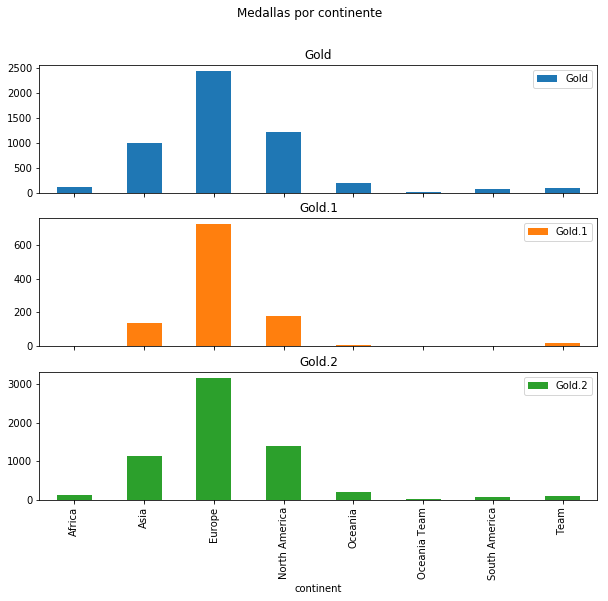

In [7]:
ax.plot.bar(subplots=True,figsize=(10,8), title='Medallas por continente')